# Classification

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Загрузка данных

In [99]:
df = pd.read_csv('iris.csv')

In [100]:
df = df[df['species'] != 'virginica']

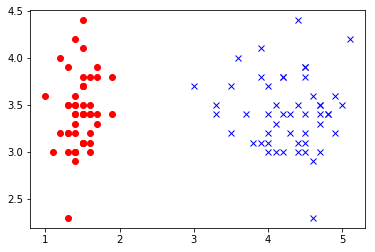

In [101]:
plt.plot(df[df['species'] == 'setosa']['petal_length'], df[df['species'] == 'setosa']['sepal_width'], 'ro')
plt.plot(df[df['species'] == 'versicolor']['petal_length'], df[df['species'] == 'setosa']['sepal_width'], 'bx')
plt.show()

In [102]:
df = df[['petal_length', 'sepal_width', 'species']].sample(frac=1)
df['species'] = df['species'].astype('category').cat.codes

In [103]:
X = np.array(df[['petal_length', 'sepal_width']].T, dtype=np.float128)
Y = np.array(df['species'], dtype=np.float128)
Y = np.reshape(Y, (1, 100))
print(X.shape)
print(Y.shape)

(2, 100)
(1, 100)


## Net input

$$ z = \sum{wx} + b $$

In [104]:
def net_input(W, X, b):
    return np.dot(W, X) + b

## Sigmoid

$$ f(z) = \frac{1}{1 + e^{-z}} $$

In [105]:
def sigmoid(Z):
    return 1.0/(1 + np.exp(-Z))

## Cost function

$$ L(\hat{y}, y) = - \frac{1}{m} \sum{y\log{\hat{y}} + (1 - y)\log{(1 - \hat{y})}}$$

In [106]:
def cost_function(W, X, b, Y):
    return -np.sum(Y * np.log(sigmoid(net_input(W, X, b)))) / X.shape[1]

## Производные

$$ \frac{\partial L}{\partial w} = \frac{1}{m} \sum{(\hat{y} - y) x} $$

In [107]:
def cost_function_derivative_w(W, X, b, Y):
    return np.dot(sigmoid(net_input(W, X, b)) - Y, X.T) / X.shape[1]

$$ \frac{\partial L}{\partial b} = \frac{1}{m} \sum{(\hat{y} - y)} $$

In [108]:
def cost_function_derivative_b(W, X, b, Y):
    return np.sum(sigmoid(net_input(W, X, b)) - Y) / X.shape[1]

## Accuracy

Доля правильно предсказанных ответов

In [109]:
def accuracy(Y_hat, Y):
    return np.sum(Y_hat == Y) / Y.shape[1]

In [111]:
print(X.shape)
print(Y.shape)

W = np.zeros((1, X.shape[0]))
b = 0

NUM_ITERATIONS = 1000
LEARNING_RATE = 10e-2

for i in range(NUM_ITERATIONS):
    print('{} step'.format(i))
    print(cost_function(W, X, b, Y))
    W = W - LEARNING_RATE * cost_function_derivative_w(W, X, b, Y)
    b = b - LEARNING_RATE * cost_function_derivative_b(W, X, b, Y)
    Y_pred = np.array([1 if sigmoid(net_input(W, x, b)) > 0.5 else 0 for x in X.T])
    print('Accuracy: {}'.format(accuracy(Y_pred, Y)))
    
print(sigmoid(net_input(W, X, b)))

(2, 100)
(1, 100)
0 step
0.34657359027997265474
Accuracy: 0.5
1 step
0.2882069737802112472
Accuracy: 0.55
2 step
0.25523386903461773244
Accuracy: 0.81
3 step
0.23408165574390198516
Accuracy: 0.97
4 step
0.21885748163080273409
Accuracy: 1.0
5 step
0.20684689696837072226
Accuracy: 1.0
6 step
0.19673053925336682822
Accuracy: 1.0
7 step
0.18783758687642636515
Accuracy: 1.0
8 step
0.1798115615792571585
Accuracy: 1.0
9 step
0.1724529621345835158
Accuracy: 1.0
10 step
0.16564262234703942073
Accuracy: 1.0
11 step
0.15930353968839718473
Accuracy: 1.0
12 step
0.15338155359415889389
Accuracy: 1.0
13 step
0.14783542782063252411
Accuracy: 1.0
14 step
0.14263168366682658073
Accuracy: 1.0
15 step
0.1377418567047473149
Accuracy: 1.0
16 step
0.13314100043986416723
Accuracy: 1.0
17 step
0.12880683720830743399
Accuracy: 1.0
18 step
0.12471924860769576161
Accuracy: 1.0
19 step
0.12085994668265639518
Accuracy: 1.0
20 step
0.117212243522298630185
Accuracy: 1.0
21 step
0.11376087636042680516
Accuracy: 1.0
22

Accuracy: 1.0
191 step
0.018546374810358043747
Accuracy: 1.0
192 step
0.01845875129271104778
Accuracy: 1.0
193 step
0.018371990441094404832
Accuracy: 1.0
194 step
0.018286079486347400793
Accuracy: 1.0
195 step
0.018201005910204292968
Accuracy: 1.0
196 step
0.018116757439171494587
Accuracy: 1.0
197 step
0.018033322038582797436
Accuracy: 1.0
198 step
0.017950687906826636767
Accuracy: 1.0
199 step
0.017868843469739632265
Accuracy: 1.0
200 step
0.017787777375160857335
Accuracy: 1.0
201 step
0.01770747848764149982
Accuracy: 1.0
202 step
0.017627935883304777455
Accuracy: 1.0
203 step
0.017549138844851164798
Accuracy: 1.0
204 step
0.017471076856704172452
Accuracy: 1.0
205 step
0.017393739600292096261
Accuracy: 1.0
206 step
0.017317116949461324052
Accuracy: 1.0
207 step
0.017241198966016949677
Accuracy: 1.0
208 step
0.017165975895386599826
Accuracy: 1.0
209 step
0.017091438162403529107
Accuracy: 1.0
210 step
0.017017576367205181671
Accuracy: 1.0
211 step
0.016944381281243555306
Accuracy: 1.0
2

Accuracy: 1.0
377 step
0.010012862504061478694
Accuracy: 1.0
378 step
0.009988910990232790432
Accuracy: 1.0
379 step
0.009965080626199596715
Accuracy: 1.0
380 step
0.0099413704824892043875
Accuracy: 1.0
381 step
0.009917779639158903989
Accuracy: 1.0
382 step
0.009894307185673907233
Accuracy: 1.0
383 step
0.009870952220787156974
Accuracy: 1.0
384 step
0.009847713852420976404
Accuracy: 1.0
385 step
0.009824591197550524581
Accuracy: 1.0
386 step
0.009801583382089026178
Accuracy: 1.0
387 step
0.009778689540774744192
Accuracy: 1.0
388 step
0.009755908817059664626
Accuracy: 1.0
389 step
0.009733240362999863038
Accuracy: 1.0
390 step
0.009710683339147523415
Accuracy: 1.0
391 step
0.009688236914444580351
Accuracy: 1.0
392 step
0.009665900266117956081
Accuracy: 1.0
393 step
0.0096436725795763646526
Accuracy: 1.0
394 step
0.009621553048308655831
Accuracy: 1.0
395 step
0.009599540873783672104
Accuracy: 1.0
396 step
0.009577635265351592467
Accuracy: 1.0
397 step
0.009555835440146737385
Accuracy: 1

Accuracy: 1.0
575 step
0.006844070840838165074
Accuracy: 1.0
576 step
0.0068333954565351711786
Accuracy: 1.0
577 step
0.0068227555059093815972
Accuracy: 1.0
578 step
0.006812150809915068965
Accuracy: 1.0
579 step
0.0068015811907187747886
Accuracy: 1.0
580 step
0.006791046471689033919
Accuracy: 1.0
581 step
0.0067805464773862033827
Accuracy: 1.0
582 step
0.0067700810335523946675
Accuracy: 1.0
583 step
0.006759649967101507857
Accuracy: 1.0
584 step
0.006749253106109366857
Accuracy: 1.0
585 step
0.0067388902798039540843
Accuracy: 1.0
586 step
0.006728561318555743764
Accuracy: 1.0
587 step
0.0067182660538681324754
Accuracy: 1.0
588 step
0.006708004318367965982
Accuracy: 1.0
589 step
0.006697775945796161006
Accuracy: 1.0
590 step
0.00668758077099842107
Accuracy: 1.0
591 step
0.0066774186299160450865
Accuracy: 1.0
592 step
0.0066672893595768277957
Accuracy: 1.0
593 step
0.0066571927980860508366
Accuracy: 1.0
594 step
0.006647128784617563549
Accuracy: 1.0
595 step
0.006637097159404952279
Accu

Accuracy: 1.0
840 step
0.0048742560962983343455
Accuracy: 1.0
841 step
0.004869082785418997636
Accuracy: 1.0
842 step
0.0048639212094261670123
Accuracy: 1.0
843 step
0.0048587713276926679246
Accuracy: 1.0
844 step
0.004853633099780130219
Accuracy: 1.0
845 step
0.004848506485437888143
Accuracy: 1.0
846 step
0.0048433914446018880053
Accuracy: 1.0
847 step
0.0048382879373936035748
Accuracy: 1.0
848 step
0.0048331959241189589194
Accuracy: 1.0
849 step
0.0048281153652672589246
Accuracy: 1.0
850 step
0.0048230462215101270855
Accuracy: 1.0
851 step
0.004817988453700450833
Accuracy: 1.0
852 step
0.004812942022871334099
Accuracy: 1.0
853 step
0.004807906890235057214
Accuracy: 1.0
854 step
0.0048028830171820439607
Accuracy: 1.0
855 step
0.004797870365279835855
Accuracy: 1.0
856 step
0.0047928688962720734474
Accuracy: 1.0
857 step
0.00478787857207748472
Accuracy: 1.0
858 step
0.004782899354788880419
Accuracy: 1.0
859 step
0.00477793120667215634
Accuracy: 1.0
860 step
0.0047729740901653025123
Accu

## Scikit-learn

In [93]:
from sklearn.linear_model import LogisticRegression

In [95]:
clf = LogisticRegression()
clf.fit(X.T, Y.T)

/Users/bsalyp/env_python/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
y_pred = clf.predict(X.T)

In [97]:
accuracy(clf.coef_, X, clf.intercept_, Y)

1.0